In [3]:
#We have two data sets. The world happiness and the world bank data per various years.
#Join the 1.World Happiness Report 2021 with 2. World bank data
# Reading data from World Happiness Report 2021
with open('world-happiness-report-2021.csv', 'r') as fp:
    data = fp.read()

# Reading data from world bank data
with open('facttable.csv', 'r') as fp:
    data2 = fp.read()
# The second data set needs a lookup to allow for a comparison 
import pandas as pd

df_main = pd.read_csv('facttable.csv')  # replace with your main csv file
df_lookup = pd.read_csv('dimension_country.csv')  # replace with your lookup csv file

df_merged = df_main.merge(df_lookup, on='Country Code', how='left')

print(df_merged)



     Country Code     Indicator Code        2000        2001        2002  \
0             AFE     IC.BUS.DISC.XQ         NaN         NaN         NaN   
1             AFE     IC.CRD.INFO.XQ         NaN         NaN         NaN   
2             AFE  FS.AST.PRVT.GD.ZS   74.979893   77.003130   62.432376   
3             AFE  EG.USE.ELEC.KH.PC  780.702624  743.916044  769.080854   
4             AFE     EG.IMP.CONS.ZS  -31.391070  -29.136323  -32.910884   
...           ...                ...         ...         ...         ...   
8773          ZWE  IC.TAX.TOTL.CP.ZS         NaN         NaN         NaN   
8774          ZWE     SE.PRM.TCAQ.ZS         NaN         NaN         NaN   
8775          ZWE  SL.UEM.TOTL.FE.ZS    4.622000    4.595000    4.599000   
8776          ZWE  SL.UEM.TOTL.MA.ZS    6.698000    6.084000    5.512000   
8777          ZWE  SP.URB.TOTL.IN.ZS   33.758000   34.170000   34.585000   

            2003        2004        2005        2006        2007  ...  \
0            N

In [4]:
#Saving the merged data to a CSV file named 'merged.csv'. 
df_merged.to_csv('merged.csv', index=False)

#It also reads the World Happiness Report 2021 data from a CSV file, renames one of its columns,and saves it to another
# CSV file named 'World-happiness2021.csv'.
df = pd.read_csv('world-happiness-report-2021.csv')  # replace with your csv file

df.rename(columns={'Country name': 'Country Name'}, inplace=True)
df.to_csv('World-hapiness2021.csv', index=False)



In [5]:
df_main = pd.read_csv('merged.csv')  # replace with your main csv file
df_lookup = pd.read_csv('world-hapiness2021.csv')  # replace with your lookup csv file

df_mergedassi = df_main.merge(df_lookup, on='Country Name', how='left')

print(df_mergedassi)



     Country Code     Indicator Code        2000        2001        2002  \
0             AFE     IC.BUS.DISC.XQ         NaN         NaN         NaN   
1             AFE     IC.CRD.INFO.XQ         NaN         NaN         NaN   
2             AFE  FS.AST.PRVT.GD.ZS   74.979893   77.003130   62.432376   
3             AFE  EG.USE.ELEC.KH.PC  780.702624  743.916044  769.080854   
4             AFE     EG.IMP.CONS.ZS  -31.391070  -29.136323  -32.910884   
...           ...                ...         ...         ...         ...   
8773          ZWE  IC.TAX.TOTL.CP.ZS         NaN         NaN         NaN   
8774          ZWE     SE.PRM.TCAQ.ZS         NaN         NaN         NaN   
8775          ZWE  SL.UEM.TOTL.FE.ZS    4.622000    4.595000    4.599000   
8776          ZWE  SL.UEM.TOTL.MA.ZS    6.698000    6.084000    5.512000   
8777          ZWE  SP.URB.TOTL.IN.ZS   33.758000   34.170000   34.585000   

            2003        2004        2005        2006        2007  ...  \
0            N

In [6]:
#The merged data set 
df_mergedassi.to_csv('mergedassi.csv', index=False)

In [7]:
#We begin the analysis
#import the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('mergedassi.csv')


#Perform an open-ended Exploratory Data Analysis (EDA) on the enriched data set
#Produce summary statistics
summary=df.describe()
print(summary)

               2000          2001          2002          2003          2004  \
count   4000.000000   4101.000000   4224.000000   4622.000000   4732.000000   
mean     172.306465    170.905100    169.038457    162.514276    162.076537   
std     1173.381035   1173.115359   1171.957625   1128.703999   1129.406445   
min    -1938.661900  -1596.408025  -1528.398498  -1169.751740  -1145.385066   
25%        3.353995      3.268000      3.114927      3.790232      4.099196   
50%       12.686647     12.424415     12.247993     16.120652     16.375662   
75%       49.065841     49.612999     47.785180     51.588042     51.296884   
max    26201.525577  26950.394430  27896.898683  27666.386894  28215.452248   

               2005          2006          2007          2008          2009  \
count   5324.000000   5336.000000   5672.000000   5589.000000   5700.000000   
mean     151.082780    154.611901    148.902699    152.785205    146.991573   
std     1082.363876   1105.413912   1105.237499   1

In [8]:
#Summary statistics for perception on corruption

mean = df['Perceptions of corruption'].mean()
std_dev = df['Perceptions of corruption'].std()

print('Mean: ', mean)
print('Standard deviation: ', std_dev)

Mean:  0.7241603053435115
Standard deviation:  0.18568372591204288


C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\User\anaconda3\envs\learn-env\lib\site-packages\numpy\lib\histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


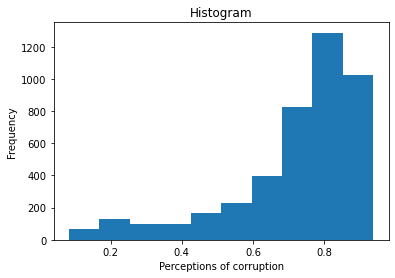

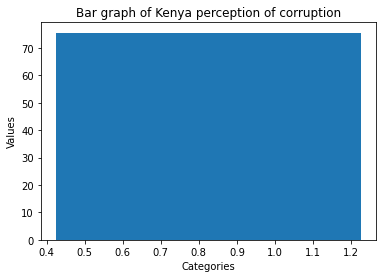

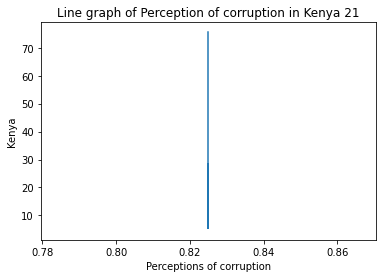

In [10]:
#Use data exploration, visualizations (at least 5 different kinds), distributions, and discussed the distributions as pertaining to the given dataset.
#Histogram
plt.hist(df['Perceptions of corruption'])
plt.title('Histogram')
plt.xlabel('Perceptions of corruption')
plt.ylabel('Frequency')
plt.show()


#Bar graph
kenya_data = df[df['Country Name'] == 'Kenya']
plt.bar(kenya_data['Perceptions of corruption'], kenya_data['2021'])
plt.title('Bar graph of Kenya perception of corruption')
plt.xlabel('Categories')
plt.ylabel('Values')
plt.show()

#Line graph
plt.plot(kenya_data['Perceptions of corruption'], kenya_data['2021'])
plt.title('Line graph of Perception of corruption in Kenya 21')
plt.xlabel('Perceptions of corruption')
plt.ylabel('Kenya')
plt.show()

#An attempt to remove this error , results in error on df not being defined.

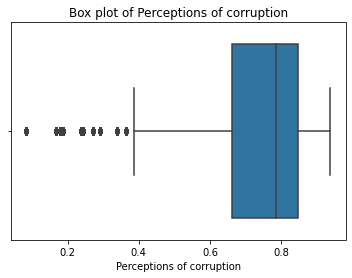

In [9]:
#Boxplot
sns.boxplot(x='Perceptions of corruption', data=df)
plt.title('Box plot of Perceptions of corruption')
plt.show()




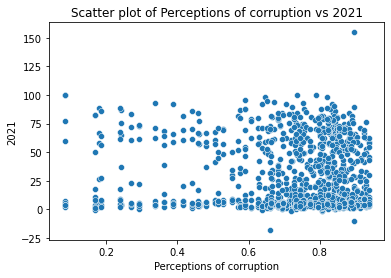

In [10]:
#Scatter plot 
sns.scatterplot(x='Perceptions of corruption', y='2021', data=df)
plt.title('Scatter plot of Perceptions of corruption vs 2021')
plt.show()

In [12]:
#Summary of the subsahara Africa countries
df = pd.read_csv('world-happiness-report-2021.csv') 

# Filter data based on region
df_filtered = df[df['Regional indicator'] == 'Sub-Saharan Africa']

print(df_filtered)

            Country name  Regional indicator  Ladder score  \
49             Mauritius  Sub-Saharan Africa         6.049   
82   Congo (Brazzaville)  Sub-Saharan Africa         5.342   
84           Ivory Coast  Sub-Saharan Africa         5.306   
90              Cameroon  Sub-Saharan Africa         5.142   
91               Senegal  Sub-Saharan Africa         5.132   
94                 Ghana  Sub-Saharan Africa         5.088   
95                 Niger  Sub-Saharan Africa         5.074   
97                Gambia  Sub-Saharan Africa         5.051   
98                 Benin  Sub-Saharan Africa         5.045   
101               Guinea  Sub-Saharan Africa         4.984   
102         South Africa  Sub-Saharan Africa         4.956   
111                Gabon  Sub-Saharan Africa         4.852   
112         Burkina Faso  Sub-Saharan Africa         4.834   
114           Mozambique  Sub-Saharan Africa         4.794   
115              Nigeria  Sub-Saharan Africa         4.759   
116     

In [13]:
#Generate summary Statistics for Subsaharan countries

summary_stats = df_filtered.describe()

print(summary_stats)

       Ladder score  Standard error of ladder score  upperwhisker  \
count     36.000000                       36.000000     36.000000   
mean       4.494472                        0.078333      4.648250   
std        0.654892                        0.016160      0.653519   
min        3.145000                        0.051000      3.259000   
25%        4.098500                        0.068750      4.245750   
50%        4.616000                        0.074000      4.763500   
75%        4.999250                        0.089250      5.167250   
max        6.049000                        0.120000      6.165000   

       lowerwhisker  Logged GDP per capita  Social support  \
count     36.000000              36.000000       36.000000   
mean       4.340889               8.075194        0.696750   
std        0.657889               0.802880        0.095769   
min        3.030000               6.635000        0.489000   
25%        3.951500               7.615500        0.638250   
50%   

In [32]:
#Count of subsaharan countries
num_of_countries = len(df_filtered['Country name'].unique())

print(f'Number of Sub-Saharan countries: {num_of_countries}')

# To get Kenyas position
# Filter the DataFrame to only include rows where 'Regional indicator' is 'Sub-Saharan Africa' and 'Country name' is 'Kenya'
kenya_row = df[(df['Regional indicator'] == 'Sub-Saharan Africa') & (df['Country name'] == 'Kenya')]

# Get the position of Kenya in the list
kenya_position = kenya_row.index.tolist()[0]

print(f'Position of Kenya in list: {kenya_position}')



Number of Sub-Saharan countries: 36
Position of Kenya in list: 120


In [36]:
#World bank indicators for happier country as compared to Kenya 
# Reading data from world bank data
# Load the CSV file into a DataFrame
df = pd.read_csv('facttable.csv')

# Filter the DataFrame to only include rows where 'Country Code' is either 'FIN' or 'KEN'
finland_or_kenya_df = df[(df['Country Code'] == 'FIN') | (df['Country Code'] == 'KEN')]

print(finland_or_kenya_df)




     Country Code     Indicator Code          2000          2001  \
3828          FIN     IC.BUS.DISC.XQ           NaN           NaN   
3829          FIN     IC.CRD.INFO.XQ           NaN           NaN   
3830          FIN  FS.AST.PRVT.GD.ZS           NaN     52.649105   
3831          FIN  EG.USE.ELEC.KH.PC  15305.409809  15709.883254   
3832          FIN     EG.IMP.CONS.ZS     53.922886     53.781972   
...           ...                ...           ...           ...   
4978          KEN  IC.TAX.TOTL.CP.ZS           NaN           NaN   
4979          KEN     SE.PRM.TCAQ.ZS           NaN           NaN   
4980          KEN  SL.UEM.TOTL.FE.ZS      3.281000      3.244000   
4981          KEN  SL.UEM.TOTL.MA.ZS      2.766000      2.739000   
4982          KEN  SP.URB.TOTL.IN.ZS     19.892000     20.239000   

              2002          2003          2004          2005          2006  \
3828           NaN           NaN           NaN      6.000000      6.000000   
3829           NaN         

In [43]:
# Select only the column'2021

# Extract the '2021' and 'Country Code' columns
selected_columns_df = finland_or_kenya_df[['Country Code','Indicator Code','2021']].dropna

print(selected_columns_df)


<bound method DataFrame.dropna of      Country Code     Indicator Code       2021
3836          FIN  NY.GDP.MKTP.KD.ZG   3.474547
3840          FIN     FP.CPI.TOTL.ZG   2.194574
3842          FIN  SL.TLF.CACT.FE.ZS  56.459999
3843          FIN  SL.TLF.CACT.MA.ZS  64.028999
3849          FIN  EN.URB.LCTY.UR.ZS  27.759362
3858          FIN  SL.UEM.TOTL.FE.ZS   6.984000
3859          FIN  SL.UEM.TOTL.MA.ZS   8.021000
3860          FIN  SP.URB.TOTL.IN.ZS  85.596000
4958          KEN  NY.GDP.MKTP.KD.ZG   7.517355
4960          KEN  SE.XPD.TOTL.GD.ZS   4.799036
4962          KEN     FP.CPI.TOTL.ZG   6.110909
4963          KEN        FR.INR.LNDP   5.393025
4964          KEN  SL.TLF.CACT.FE.ZS  70.984001
4965          KEN  SL.TLF.CACT.MA.ZS  75.564003
4971          KEN  EN.URB.LCTY.UR.ZS  31.417426
4980          KEN  SL.UEM.TOTL.FE.ZS   6.094000
4981          KEN  SL.UEM.TOTL.MA.ZS   5.402000
4982          KEN  SP.URB.TOTL.IN.ZS  28.493000>
